In [16]:
from MDAnalysis import Universe
from MDAnalysis.analysis import pca
from pathlib import Path

In [17]:
pdbs=Universe("glic_test/GLIC_ensemble.pdb")

/home/ozyo/.local/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [18]:
results=pca.PCA(pdbs)
results.run()

/home/ozyo/.local/lib/python3.9/site-packages/MDAnalysis/coordinates/base.py:892: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
order=['correct_2XQ3_1.pdb','correct_2XQ4_1.pdb','correct_2XQ5_1.pdb','correct_2XQ6_1.pdb','correct_2XQ7_1.pdb','correct_2XQ8_1.pdb',
'correct_2XQ9_1.pdb','correct_2XQA_1.pdb','correct_3EAM_1.pdb','correct_3EHZ_1.pdb','correct_3EI0_1.pdb','correct_3LSV_1.pdb','correct_3P4W_1.pdb',
'correct_3P50_1.pdb','correct_3TLS_1.pdb','correct_3TLT_1.pdb','correct_3TLU_1.pdb','correct_3TLV_1.pdb','correct_3TLW_1.pdb','correct_3UU4_1.pdb',
'correct_3UU5_1.pdb','correct_3UU6_1.pdb','correct_3UU8_1.pdb','correct_3UUB_1.pdb','correct_3UUB_2.pdb','correct_4F8H_1.pdb','correct_4HFB_1.pdb',
'correct_4HFC_1.pdb','correct_4HFD_1.pdb','correct_4HFE_1.pdb','correct_4HFH_1.pdb','correct_4HFI_1.pdb','correct_4IL4_1.pdb','correct_4IL9_1.pdb',
'correct_4ILB_1.pdb','correct_4ILC_1.pdb','correct_4IRE_1.pdb','correct_4LMJ_1.pdb','correct_4LMK_1.pdb','correct_4LML_1.pdb','correct_4NPP_1.pdb',
'correct_4NPQ_1.pdb','correct_4NPQ_4.pdb','correct_4QH1_1.pdb','correct_4QH4_1.pdb','correct_4QH5_1.pdb','correct_4ZZB_1.pdb','correct_4ZZC_1.pdb',
'correct_5HCJ_1.pdb','correct_5HCM_1.pdb','correct_5HEG_1.pdb','correct_5HEH_1.pdb','correct_5IUX_1.pdb','correct_5J0Z_1.pdb','correct_5L47_1.pdb',
'correct_5L4E_1.pdb','correct_5L4H_1.pdb','correct_5MUO_1.pdb','correct_5MUR_1.pdb','correct_5MVM_1.pdb','correct_5MVN_1.pdb','correct_5MZQ_1.pdb',
'correct_5MZR_1.pdb','correct_5MZT_1.pdb','correct_5NJY_1.pdb','correct_5NKJ_1.pdb','correct_5V6N_1.pdb','correct_5V6O_1.pdb','correct_6EMX_1.pdb',
'correct_6F0I_1.pdb','correct_6F0J_1.pdb','correct_6F0M_1.pdb','correct_6F0N_1.pdb','correct_6F0R_1.pdb','correct_6F0U_1.pdb','correct_6F0V_1.pdb',
'correct_6F0Z_1.pdb','correct_6F10_1.pdb','correct_6F11_1.pdb','correct_6F12_1.pdb','correct_6F13_1.pdb','correct_6F15_1.pdb','correct_6F16_1.pdb',
'correct_6F7A_1.pdb','correct_6HJ3_1.pdb','correct_6HJA_1.pdb','correct_6HJB_1.pdb','correct_6HJI_1.pdb','correct_6HJZ_1.pdb','correct_6HJZ_2.pdb',
'correct_6HPP_1.pdb','correct_6HY5_1.pdb','correct_6HY9_1.pdb','correct_6HYA_1.pdb','correct_6HYV_1.pdb','correct_6HYW_1.pdb','correct_6HYX_1.pdb',
'correct_6HYZ_1.pdb','correct_6HZ0_1.pdb','correct_6HZ1_1.pdb','correct_6HZ3_1.pdb','correct_6HZW_1.pdb','correct_6I08_1.pdb']
transformed = results.transform(pdbs.select_atoms("all"), n_components=5)
transformed.shape
df = pd.DataFrame(transformed,
                  columns=['PC{}'.format(i+1) for i in range(5)])
df["order"]=order
df.head()

,PC1,PC2,PC3,PC4,PC5,order
0,47.636376,9.250627,5.338334,-0.244106,12.512066,correct_2XQ3_1.pdb
1,48.201686,10.463691,5.113717,0.066687,17.406885,correct_2XQ4_1.pdb
2,47.692286,9.781894,4.577067,-0.251222,14.487661,correct_2XQ5_1.pdb
3,47.670831,9.168814,5.085945,-0.446186,12.331027,correct_2XQ6_1.pdb
4,40.504475,12.420629,7.879351,1.694362,-1.534600,correct_2XQ7_1.pdb


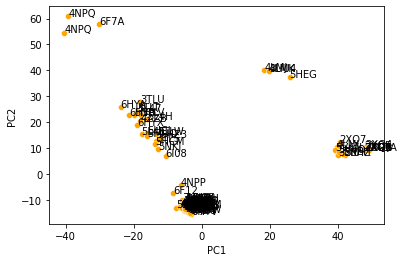

In [27]:
import seaborn as sns

p=sns.scatterplot(data=df,x="PC1",y="PC2",color="orange")
for _,row in df.iterrows():
    plt.text(x=row.PC1, y=row.PC2, s=row.order.split("_")[1])